#### IMPORTS

In [3]:
import os
default_dir = os.getcwd()
def default_directory():
    os.chdir(f"{default_dir}")
    print(f"you are back to the default directory: {default_dir}")


In [8]:
os.chdir("../..")
import torch
import numpy as np
from tqdm import tqdm

from dataloader import MyCustomDataset
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.optim as optim

import os
from model_nn import  Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [11]:
default_directory()
os.getcwd()

you are back to the default directory: d:\LARGE_CNN\ECG_ML\MAIN\zenodo_data\cg_32_single_disease


'd:\\LARGE_CNN\\ECG_ML\\MAIN\\zenodo_data\\cg_32_single_disease'

#### LOAD DATA

In [12]:
# all files in the directory
os.listdir()

['main.ipynb',
 'single_1dAVB_zenodo_cg_32_0.txt',
 'single_1dAVB_zenodo_cg_32_1.txt',
 'single_1dAVB_zenodo_cg_32_2.txt',
 'single_1dAVB_zenodo_cg_32_3.txt',
 'single_1dAVB_zenodo_cg_32_4.txt',
 'single_1dAVB_zenodo_cg_32_5.txt',
 'single_1dAVB_zenodo_cg_32_6.txt',
 'single_1dAVB_zenodo_cg_32_7.txt',
 'single_1dAVB_zenodo_cg_32_8.txt',
 'single_1dAVB_zenodo_cg_32_9.txt',
 'single_AF_zenodo_cg_32_0.txt',
 'single_AF_zenodo_cg_32_1.txt',
 'single_AF_zenodo_cg_32_2.txt',
 'single_AF_zenodo_cg_32_3.txt',
 'single_AF_zenodo_cg_32_4.txt',
 'single_AF_zenodo_cg_32_5.txt',
 'single_AF_zenodo_cg_32_6.txt',
 'single_AF_zenodo_cg_32_7.txt',
 'single_AF_zenodo_cg_32_8.txt',
 'single_AF_zenodo_cg_32_9.txt',
 'single_LBBB_zenodo_cg_32_0.txt',
 'single_LBBB_zenodo_cg_32_1.txt',
 'single_LBBB_zenodo_cg_32_2.txt',
 'single_LBBB_zenodo_cg_32_3.txt',
 'single_LBBB_zenodo_cg_32_4.txt',
 'single_LBBB_zenodo_cg_32_5.txt',
 'single_LBBB_zenodo_cg_32_6.txt',
 'single_LBBB_zenodo_cg_32_7.txt',
 'single_LBBB_z

## 7 classes

In [15]:
diseases_saving_name ={"1dAVB": "single_1dAVB", "RBBB": "single_RBBB", "LBBB": "single_LBBB", "SB": "single_SB", "ST": "single_ST", "AF": "single_AF", "normal_ecg": "single_normal"}
diseases_name = ["1dAVB", "RBBB", "LBBB", "SB", "ST", "AF", "normal_ecg"]

In [22]:
# all 7 classes

data_1dAVB_list=[]
for i in tqdm(range(10), desc="Loading files of 1dAVB"):
    cc = np.loadtxt(f"single_1dAVB_zenodo_cg_32_{i}.txt")
    data_1dAVB_list.append(cc)
data_1dAVB_list=np.array(data_1dAVB_list)
print(f"shape of 1dAVB data: {data_1dAVB_list.shape}")

data_RBBB_list=[]
for i in tqdm(range(10), desc="Loading files of RBBB"):
    cc = np.loadtxt(f"single_RBBB_zenodo_cg_32_{i}.txt")
    data_RBBB_list.append(cc)
data_RBBB_list=np.array(data_RBBB_list)
print(f"shape of RBBB data: {data_RBBB_list.shape}")

data_LBBB_list=[]
for i in tqdm(range(10), desc="Loading files of LBBB"):
    cc = np.loadtxt(f"single_LBBB_zenodo_cg_32_{i}.txt")
    data_LBBB_list.append(cc)
data_LBBB_list=np.array(data_LBBB_list)
print(f"shape of LBBB data: {data_LBBB_list.shape}")


data_SB_list=[]
for i in tqdm(range(10), desc="Loading files of SB"):
    cc = np.loadtxt(f"single_SB_zenodo_cg_32_{i}.txt")
    data_SB_list.append(cc)
data_SB_list=np.array(data_SB_list)
print(f"shape of SB data: {data_SB_list.shape}")

data_ST_list=[]
for i in tqdm(range(10), desc="Loading files of ST"):
    cc = np.loadtxt(f"single_ST_zenodo_cg_32_{i}.txt")
    data_ST_list.append(cc)
data_ST_list=np.array(data_ST_list)
print(f"shape of ST data: {data_ST_list.shape}")

data_AF_list=[]
for i in tqdm(range(10), desc="Loading files of AF"):
    cc = np.loadtxt(f"single_AF_zenodo_cg_32_{i}.txt")
    data_AF_list.append(cc)
data_AF_list=np.array(data_AF_list)
print(f"shape of AF data: {data_AF_list.shape}")

data_normal_list=[]
for i in tqdm(range(10), desc="Loading files of normal"):
    cc = np.loadtxt(f"single_normal_zenodo_cg_32_{i}.txt")
    data_normal_list.append(cc)
data_normal_list=np.array(data_normal_list)
print(f"shape of normal data: {data_normal_list.shape}")



data_1dAVB_list=data_1dAVB_list.reshape(4000,128,128)
data_RBBB_list=data_RBBB_list.reshape(4000,128,128)
data_LBBB_list=data_LBBB_list.reshape(4000,128,128)
data_SB_list=data_SB_list.reshape(4000,128,128)
data_ST_list=data_ST_list.reshape(4000,128,128)
data_AF_list=data_AF_list.reshape(4000,128,128)
data_normal_list=data_normal_list.reshape(4000,128,128)



Loading files of 1dAVB: 100%|██████████| 10/10 [00:40<00:00,  4.08s/it]


shape of 1dAVB data: (10, 400, 16384)


Loading files of RBBB: 100%|██████████| 10/10 [00:35<00:00,  3.52s/it]


shape of RBBB data: (10, 400, 16384)


Loading files of LBBB: 100%|██████████| 10/10 [00:34<00:00,  3.48s/it]


shape of LBBB data: (10, 400, 16384)


Loading files of SB: 100%|██████████| 10/10 [00:35<00:00,  3.55s/it]


shape of SB data: (10, 400, 16384)


Loading files of ST: 100%|██████████| 10/10 [00:35<00:00,  3.53s/it]


shape of ST data: (10, 400, 16384)


Loading files of AF: 100%|██████████| 10/10 [00:35<00:00,  3.51s/it]


shape of AF data: (10, 400, 16384)


Loading files of normal: 100%|██████████| 10/10 [00:36<00:00,  3.60s/it]

shape of normal data: (10, 400, 16384)


#### batches

In [23]:
labels=np.concatenate((np.zeros(4000),np.ones(4000),2*np.ones(4000),3*np.ones(4000),4*np.ones(4000),5*np.ones(4000),6*np.ones(4000)))
images=np.concatenate((data_1dAVB_list,data_RBBB_list,data_LBBB_list,data_SB_list,data_ST_list,data_AF_list,data_normal_list))
images = images.reshape(28000,1,128,128)
del data_1dAVB_list,data_RBBB_list,data_LBBB_list,data_SB_list,data_ST_list,data_AF_list,data_normal_list

print(f"images shape: {images.shape},\n labels shape: {labels.shape}")

images shape: (28000, 1, 128, 128),
 labels shape: (28000,)


In [24]:
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)
train_dataset = MyCustomDataset(images_train, labels_train)
test_dataset = MyCustomDataset(images_test, labels_test)
# Define a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
del images_train, images_test, labels_train, labels_test ,images, labels ,train_dataset, test_dataset


#### model

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        
        # Batch normalization layers
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        
        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 16 * 16, 512)  # Updated for 128×128 input
        self.fc2 = nn.Linear(512, 7)  # 7 classes
        
        # Dropout
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Convolutional layers with ReLU, batch norm, and pooling
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # Output: 64x64
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # Output: 32x32
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # Output: 16x16
        
        # Flatten the tensor for fully connected layers
        x = x.view(x.size(0), -1)  # Now (batch_size, 128 * 16 * 16)
        
        # Fully connected layers with ReLU and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x  # No softmax if using CrossEntropyLoss



#### model training

In [26]:
"""this will run when there is no invalid sample   
****ignore it***********************"""


torch.manual_seed(42)  # Set seed for reproducibility
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model__1 =  SmallCNN().to(device)

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = torch.optim.Adam(model__1.parameters(), lr=0.001)  

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 50
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []

for epoch in range(num_epochs):
    model__1.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        
        outputs = model__1(images)
        loss = criterion(outputs, labels)
        # print(loss.item(),"index=",i) #########
        
        # Backward pass and optimization
        optimizer.zero_grad() # for efficency

        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__1.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model__1(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    test_losses_list.append(test_loss / len(test_dataloader))
    
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Epoch [1/50], Train Loss: 1.4756, Test Loss: 0.8277, Train Accuracy: 51.6741, Test Accuracy: 67.4464
Epoch [2/50], Train Loss: 0.9024, Test Loss: 0.8592, Train Accuracy: 64.6875, Test Accuracy: 67.0536
Epoch [3/50], Train Loss: 0.8165, Test Loss: 0.8421, Train Accuracy: 68.7143, Test Accuracy: 65.8929
Epoch [4/50], Train Loss: 0.7576, Test Loss: 0.6422, Train Accuracy: 71.3259, Test Accuracy: 78.1071
Epoch [5/50], Train Loss: 0.6843, Test Loss: 0.5874, Train Accuracy: 75.6161, Test Accuracy: 80.1786
Epoch [6/50], Train Loss: 0.6313, Test Loss: 0.5391, Train Accuracy: 77.9420, Test Accuracy: 82.4643
Epoch [7/50], Train Loss: 0.5768, Test Loss: 0.4919, Train Accuracy: 79.9821, Test Accuracy: 85.6071
Epoch [8/50], Train Loss: 0.5475, Test Loss: 0.5720, Train Accuracy: 81.7277, Test Accuracy: 83.2500
Epoch [9/50], Train Loss: 0.5033, Test Loss: 0.4314, Train Accuracy: 83.4955, Test Accuracy: 87.5536
Epoch [10/50], Train Loss: 0.4658, Test Loss: 0.4394, Train Accuracy: 84.7589, Test Accurac

KeyboardInterrupt: 

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

# Set seed for reproducibility
torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the model, loss function, optimizer, and scheduler
model__2 = SmallCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model__2.parameters(), lr=0.001)  # Reduced learning rate
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 50
test_losses_list_1 = []
train_losses_list_1 = []
accuracy_train_list_1 = []
accuracy_test_list_1 = []
invalid_images=[]
invalid_images_lable=[]
for epoch in range(num_epochs):
    model__2.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)
        
        # Check for invalid data
        if torch.isnan(images).any() or torch.isinf(images).any():
            print(f"Invalid data found in images at batch {i}")

            invalid_images.append(images)
            invalid_images_lable.append(labels)

            continue
        if torch.isnan(labels).any() or torch.isinf(labels).any():
            print(f"Invalid data found in labels at batch {i}")
            continue

        
        
        optimizer.zero_grad()
        outputs = model__2(images)
        
        # Check for invalid outputs
        if torch.isnan(outputs).any() or torch.isinf(outputs).any():
            print(f"Invalid data found in outputs at batch {i}")
            continue
        
        loss = criterion(outputs, labels)
        
        # Check for invalid loss
        if torch.isnan(loss).any() or torch.isinf(loss).any():
            print(f"Invalid data found in loss at batch {i}")
            continue
        
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model__2.parameters(), max_norm=1.0)
        
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    
    train_losses_list_1.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__2.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)
            outputs = model__2(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    
    test_losses_list_1.append(test_loss / len(test_dataloader))
    accuracy_train_list_1.append(accuracy_train / len(train_dataloader))
    accuracy_test_list_1.append(accuracy_test / len(test_dataloader))
    scheduler.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Epoch [1/50], Train Loss: 1.1385, Test Loss: 0.7565, Train Accuracy: 63.0580, Test Accuracy: 72.8571
Epoch [2/50], Train Loss: 0.6743, Test Loss: 0.6317, Train Accuracy: 75.0714, Test Accuracy: 77.7321
Epoch [3/50], Train Loss: 0.5899, Test Loss: 0.5182, Train Accuracy: 78.8080, Test Accuracy: 82.8214
Epoch [4/50], Train Loss: 0.5354, Test Loss: 0.5113, Train Accuracy: 81.3393, Test Accuracy: 83.1786
Epoch [5/50], Train Loss: 0.4833, Test Loss: 0.4551, Train Accuracy: 83.6295, Test Accuracy: 84.9643
Epoch [6/50], Train Loss: 0.4522, Test Loss: 0.4392, Train Accuracy: 84.8482, Test Accuracy: 85.2143
Epoch [7/50], Train Loss: 0.4256, Test Loss: 0.4329, Train Accuracy: 85.7812, Test Accuracy: 85.6964
Epoch [8/50], Train Loss: 0.3992, Test Loss: 0.4115, Train Accuracy: 86.8527, Test Accuracy: 86.2857
Epoch [9/50], Train Loss: 0.3806, Test Loss: 0.3968, Train Accuracy: 87.7455, Test Accuracy: 87.1786
Epoch [10/50], Train Loss: 0.3600, Test Loss: 0.3844, Train Accuracy: 88.4107, Test Accurac

In [ ]:
# save the model
torch.save(model__2.state_dict(), 'model_smallCNN_cg32_v2.pth')
torch.save(model__2.state_dict(), 'model_smallCNN_cg32_v1.pth')

# save the loss and accuracy as excel sheet of both model
import pandas as pd
df = pd.DataFrame(data={"train_loss": train_losses_list, "test_loss": test_losses_list, "train_accuracy": accuracy_train_list, "test_accuracy": accuracy_test_list})
df.to_excel("model_smallCNN_cg32_v1.xlsx", index=False)

df = pd.DataFrame(data={"train_loss": train_losses_list_1, "test_loss": test_losses_list_1, "train_accuracy": accuracy_train_list_1, "test_accuracy": accuracy_test_list_1})
df.to_excel("model_smallCNN_cg32_v2.xlsx", index=False)



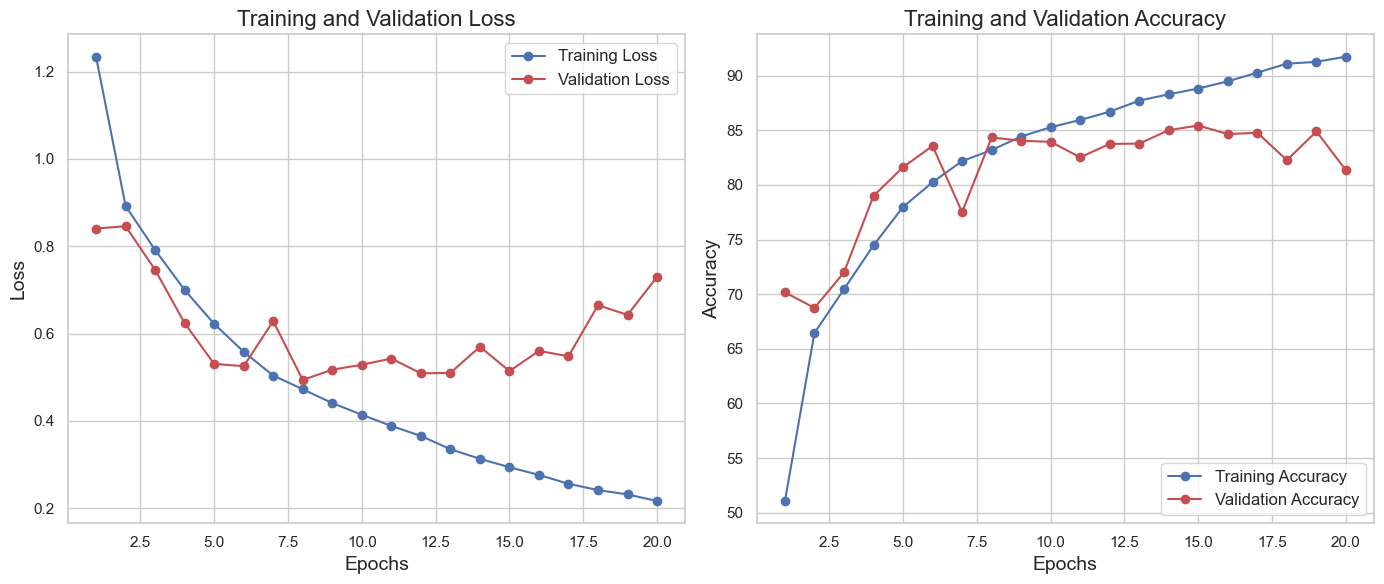

In [ ]:
from plots import accuracy_and_validation_plots


# Example data: Replace these with your actual training and validation data
epochs_= list(range(1, len(train_losses_list_1)+1))

accuracy_and_validation_plots(epochs_, train_losses_list_1, test_losses_list_1, accuracy_train_list_1,accuracy_test_list_1).plot_figure("accuracy.png")


In [ ]:

model__2.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = model__2(images.to(device))
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
cm = cm / cm.sum(axis=1)[:, np.newaxis]  # Normalize confusion matrix
df_cm = pd.DataFrame(cm, index=["ST", "SB", "SR","AF","LBBB","RBBB","1dAVB"], columns=["ST", "SB", "SR","AF","LBBB","RBBB","1dAVB"])


In [65]:
df_cm

,ST,SB,SR,AF,LBBB,RBBB,1dAVB
ST,0.724382,0.125442,0.081272,0.001767,0.067138,0.0,0.000000
SB,0.039872,0.858054,0.049442,0.004785,0.033493,0.0,0.014354
SR,0.046699,0.067633,0.859903,0.001610,0.006441,0.0,0.017713
AF,0.136207,0.093103,0.005172,0.725862,0.001724,0.0,0.037931
LBBB,0.084800,0.176000,0.027200,0.012800,0.684800,0.0,0.014400
RBBB,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
1dAVB,0.005236,0.102967,0.033159,0.000000,0.012216,0.0,0.846422


#### v1


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Set seed for reproducibility
torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the model, loss function, optimizer, and scheduler
model__2 = smallCNN_zenedo7class_V1().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model__2.parameters(), lr=0.001)  # Reduced learning rate
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 10
test_losses_list_1 = []
train_losses_list_1 = []
accuracy_train_list_1 = []
accuracy_test_list_1 = []
invalid_images=[]
invalid_images_lable=[]
for epoch in range(num_epochs):
    model__2.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)
        
        # Check for invalid data
        if torch.isnan(images).any() or torch.isinf(images).any():
            print(f"Invalid data found in images at batch {i}")

            invalid_images.append(images)
            invalid_images_lable.append(labels)

            continue
        if torch.isnan(labels).any() or torch.isinf(labels).any():
            print(f"Invalid data found in labels at batch {i}")
            continue

        
        
        optimizer.zero_grad()
        outputs = model__2(images)
        
        # Check for invalid outputs
        if torch.isnan(outputs).any() or torch.isinf(outputs).any():
            print(f"Invalid data found in outputs at batch {i}")
            continue
        
        loss = criterion(outputs, labels)
        
        # Check for invalid loss
        if torch.isnan(loss).any() or torch.isinf(loss).any():
            print(f"Invalid data found in loss at batch {i}")
            continue
        
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model__2.parameters(), max_norm=1.0)
        
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    
    train_losses_list_1.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__2.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)
            outputs = model__2(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    
    test_losses_list_1.append(test_loss / len(test_dataloader))
    accuracy_train_list_1.append(accuracy_train / len(train_dataloader))
    accuracy_test_list_1.append(accuracy_test / len(test_dataloader))
    scheduler.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Invalid data found in images at batch 291
Epoch [1/10], Train Loss: 1.6782, Test Loss: 1.4625, Train Accuracy: 37.1488, Test Accuracy: 52.4858
Invalid data found in images at batch 179
Epoch [2/10], Train Loss: 1.3966, Test Loss: 1.2791, Train Accuracy: 49.6071, Test Accuracy: 59.2566
Invalid data found in images at batch 75
Epoch [3/10], Train Loss: 1.2563, Test Loss: 1.1825, Train Accuracy: 54.8095, Test Accuracy: 60.4403
Invalid data found in images at batch 246
Epoch [4/10], Train Loss: 1.1697, Test Loss: 1.1060, Train Accuracy: 58.5000, Test Accuracy: 63.6837
Invalid data found in images at batch 477
Epoch [5/10], Train Loss: 1.1065, Test Loss: 1.0523, Train Accuracy: 60.2679, Test Accuracy: 64.8674
Invalid data found in images at batch 516
Epoch [6/10], Train Loss: 1.0552, Test Loss: 1.0111, Train Accuracy: 62.7381, Test Accuracy: 66.6193
Invalid data found in images at batch 510
Epoch [7/10], Train Loss: 1.0113, Test Loss: 0.9811, Train Accuracy: 64.5238, Test Accuracy: 67.5426


## V2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Set seed for reproducibility
torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the model, loss function, optimizer, and scheduler
model__2 = smallCNN_zenedo7class_V2().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model__2.parameters(), lr=0.001)  # Reduced learning rate
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 50
test_losses_list_1 = []
train_losses_list_1 = []
accuracy_train_list_1 = []
accuracy_test_list_1 = []
invalid_images=[]
invalid_images_lable=[]
for epoch in range(num_epochs):
    model__2.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)
        
        # Check for invalid data
        if torch.isnan(images).any() or torch.isinf(images).any():
            print(f"Invalid data found in images at batch {i}")

            invalid_images.append(images)
            invalid_images_lable.append(labels)

            continue
        if torch.isnan(labels).any() or torch.isinf(labels).any():
            print(f"Invalid data found in labels at batch {i}")
            continue

        
        
        optimizer.zero_grad()
        outputs = model__2(images)
        
        # Check for invalid outputs
        if torch.isnan(outputs).any() or torch.isinf(outputs).any():
            print(f"Invalid data found in outputs at batch {i}")
            continue
        
        loss = criterion(outputs, labels)
        
        # Check for invalid loss
        if torch.isnan(loss).any() or torch.isinf(loss).any():
            print(f"Invalid data found in loss at batch {i}")
            continue
        
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model__2.parameters(), max_norm=1.0)
        
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    
    train_losses_list_1.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__2.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)
            outputs = model__2(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    
    test_losses_list_1.append(test_loss / len(test_dataloader))
    accuracy_train_list_1.append(accuracy_train / len(train_dataloader))
    accuracy_test_list_1.append(accuracy_test / len(test_dataloader))
    scheduler.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Epoch [1/50], Train Loss: 2.0636, Test Loss: 1.9459, Train Accuracy: 14.5119, Test Accuracy: 13.3996
Epoch [2/50], Train Loss: 1.9482, Test Loss: 1.9459, Train Accuracy: 14.4821, Test Accuracy: 13.3996
Epoch [3/50], Train Loss: 1.9463, Test Loss: 1.9459, Train Accuracy: 14.4881, Test Accuracy: 13.3996


KeyboardInterrupt: 

## V3

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Set seed for reproducibility
torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define the model, loss function, optimizer, and scheduler
model__2 = smallCNN_zenedo7class_V3().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model__2.parameters(), lr=0.01)  # Reduced learning rate
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 50
test_losses_list_1 = []
train_losses_list_1 = []
accuracy_train_list_1 = []
accuracy_test_list_1 = []
invalid_images=[]
invalid_images_lable=[]
for epoch in range(num_epochs):
    model__2.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)
        
        # Check for invalid data
        if torch.isnan(images).any() or torch.isinf(images).any():
            print(f"Invalid data found in images at batch {i}")

            invalid_images.append(images)
            invalid_images_lable.append(labels)

            continue
        if torch.isnan(labels).any() or torch.isinf(labels).any():
            print(f"Invalid data found in labels at batch {i}")
            continue

        
        
        optimizer.zero_grad()
        outputs = model__2(images)
        
        # Check for invalid outputs
        if torch.isnan(outputs).any() or torch.isinf(outputs).any():
            print(f"Invalid data found in outputs at batch {i}")
            continue
        
        loss = criterion(outputs, labels)
        
        # Check for invalid loss
        if torch.isnan(loss).any() or torch.isinf(loss).any():
            print(f"Invalid data found in loss at batch {i}")
            continue
        
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model__2.parameters(), max_norm=1.0)
        
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    
    train_losses_list_1.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__2.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)
            outputs = model__2(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    
    test_losses_list_1.append(test_loss / len(test_dataloader))
    accuracy_train_list_1.append(accuracy_train / len(train_dataloader))
    accuracy_test_list_1.append(accuracy_test / len(test_dataloader))
    scheduler.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

c:\Users\Guest1\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch [1/50], Train Loss: 95.8053, Test Loss: 1.9466, Train Accuracy: 14.2500, Test Accuracy: 14.8674
Epoch [2/50], Train Loss: 6.1198, Test Loss: 1.9481, Train Accuracy: 14.1607, Test Accuracy: 13.6364
Epoch [3/50], Train Loss: 2.1324, Test Loss: 1.9461, Train Accuracy: 14.2024, Test Accuracy: 14.8674
Epoch [4/50], Train Loss: 2.0669, Test Loss: 1.9480, Train Accuracy: 14.0298, Test Accuracy: 13.9441
Epoch [5/50], Train Loss: 2.0710, Test Loss: 1.9467, Train Accuracy: 14.4524, Test Accuracy: 13.6364
Epoch [6/50], Train Loss: 1.9473, Test Loss: 1.9466, Train Accuracy: 14.3036, Test Accuracy: 14.4650
Epoch [7/50], Train Loss: 1.9471, Test Loss: 1.9476, Train Accuracy: 13.9821, Test Accuracy: 13.6364
Epoch [8/50], Train Loss: 1.9470, Test Loss: 1.9467, Train Accuracy: 14.2798, Test Accuracy: 13.6364
Epoch [9/50], Train Loss: 1.9467, Test Loss: 1.9474, Train Accuracy: 14.3095, Test Accuracy: 13.3996
Epoch [10/50], Train Loss: 1.9473, Test Loss: 1.9463, Train Accuracy: 14.0060, Test Accura